In [1]:
suppressMessages(library(dplyr))
suppressMessages(library(Seurat))
suppressMessages(library(viridis))
suppressMessages(library(anndataR))
suppressMessages(library(SeuratData))
suppressMessages(library(ggplot2))

In [2]:
out_dir <- "../../results/10_stereo_seq/05_anndata_to_seurat"

if(!dir.exists(out_dir)){
    dir.create(out_dir)
}

In [3]:
anndata_to_seurat <- function(adata, obs_names, var_names){
    counts <- t(adata$layers$counts)
    colnames(counts) <- obs_names
    rownames(counts) <- var_names
    
    obj <- CreateSeuratObject(counts = counts, 
                              meta.data = adata$obs,
                              assay = "RNA")
    
    df_coor <- as.data.frame(adata$obsm[['spatial']])
    colnames(df_coor) <- c("x", "y")
    rownames(df_coor) <- colnames(obj)
    df_coor <- df_coor[c("y", "x")]
    
    obj@images$image = new(
    Class = 'SlideSeq',
    assay = "RNA",
    key = "image_",
    coordinates = df_coor
  )
    
    return(obj)
}

Warning message:
“Data is of class dgRMatrix. Coercing to dgCMatrix.”
Warning message:
“Data is of class dgRMatrix. Coercing to dgCMatrix.”


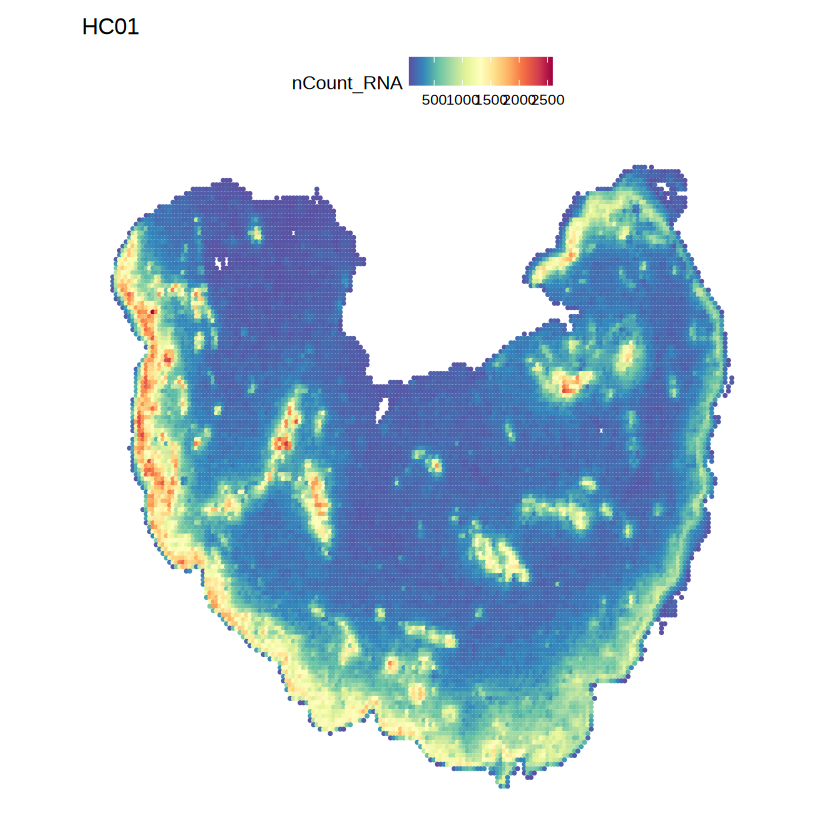

Warning message:
“Data is of class dgRMatrix. Coercing to dgCMatrix.”


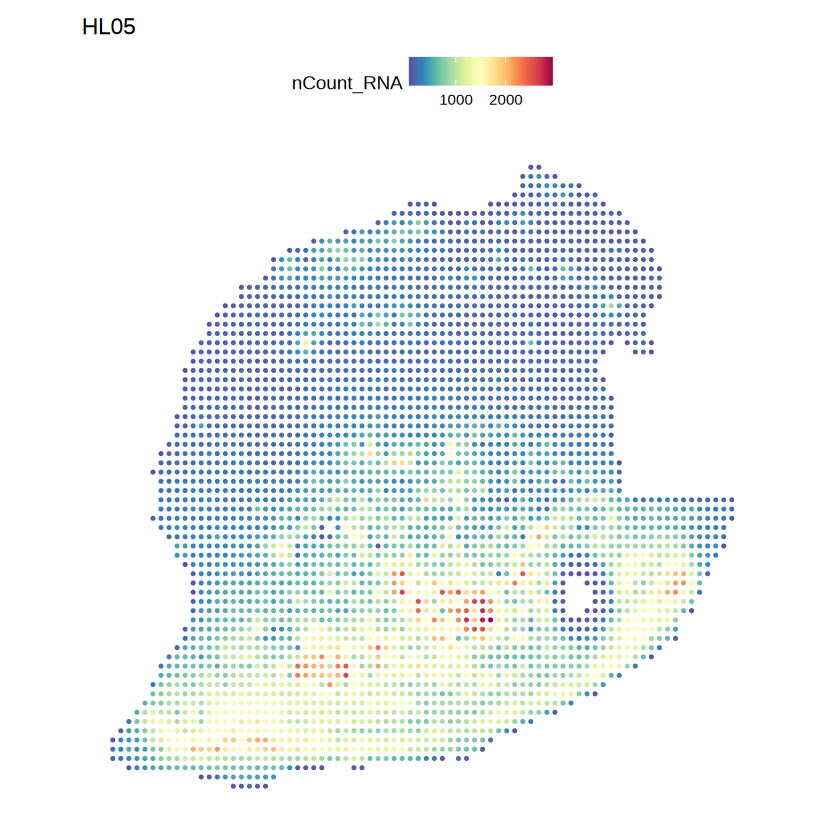

Warning message:
“Data is of class dgRMatrix. Coercing to dgCMatrix.”


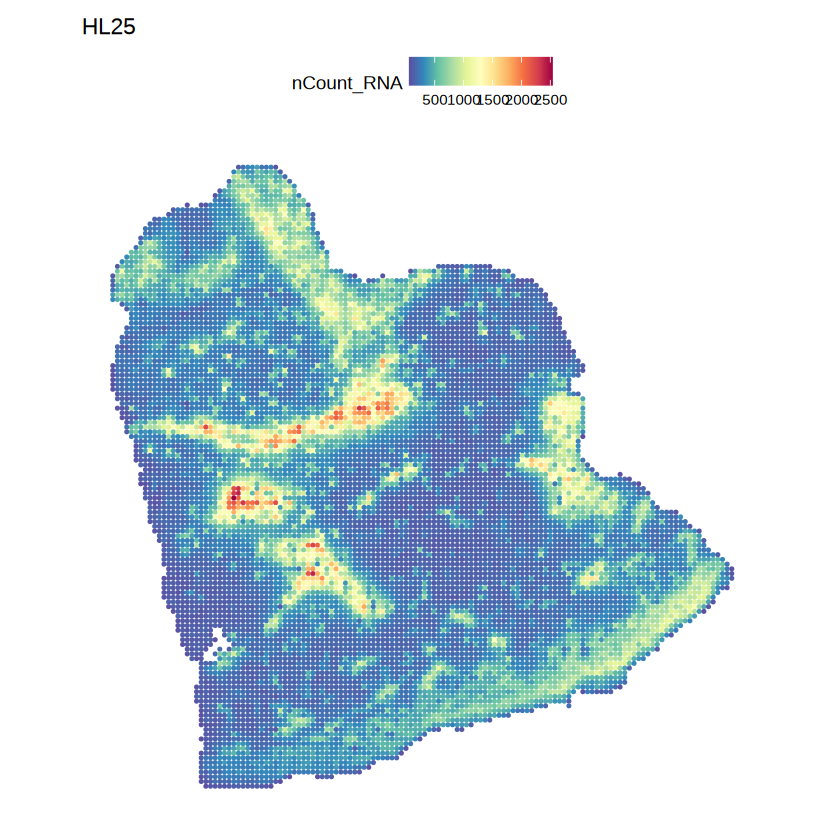

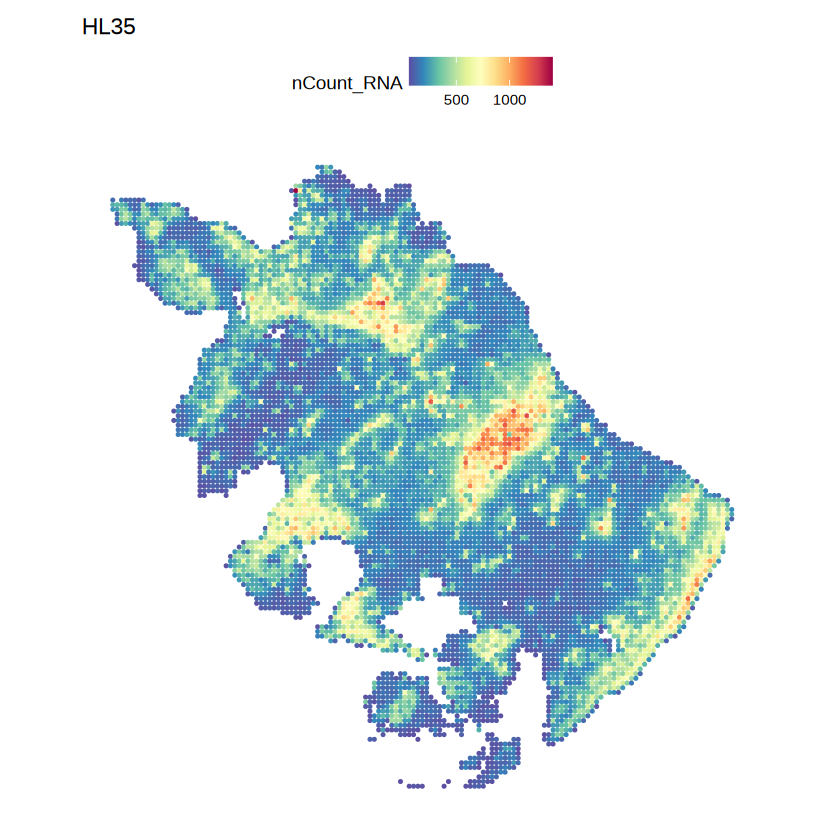

In [5]:
for(sample in c("HC01", "HL05", "HL25", "HL35")){
    adata <- read_h5ad(glue::glue("../../results/10_stereo_seq/01_process/{sample}.h5ad"))

    var_names <- make.unique(as.vector(adata$var$real_gene_name))
    
    obj <- anndata_to_seurat(adata, 
                             obs_names = adata$obs_names, 
                             var_names = var_names)
    
    p <- SpatialFeaturePlot(obj, features = "nCount_RNA") + ggtitle(sample)
    
    print(p)
    
    saveRDS(obj, glue::glue("{out_dir}/{sample}.rds"))

}

In [6]:
adata <- read_h5ad(glue::glue("../../results/10_stereo_seq/02_integrate_data/adata.h5ad"))

In [7]:
obj <- anndata_to_seurat(adata,
                         obs_names = adata$obs_names, 
                         var_names = adata$var_names)

Warning message:
“Data is of class dgRMatrix. Coercing to dgCMatrix.”


In [8]:
obj

An object of class Seurat 
13649 features across 40566 samples within 1 assay 
Active assay: RNA (13649 features, 0 variable features)
 1 layer present: counts
 1 image present: image

In [10]:
head(obj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample,condition,x,y,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,pct_counts_mt
,<fct>,<dbl>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
HC01_1,HC01,163,119,HC01,Healthy,10350,4550,124,4.828314,168,5.129899,55.95238,85.71429,100.00000,100,0,0.000000
HC01_2,HC01,192,155,HC01,Healthy,10350,4600,159,5.075174,197,5.288267,44.67005,70.05076,100.00000,100,0,0.000000
HC01_3,HC01,162,123,HC01,Healthy,10350,4650,130,4.875197,170,5.141664,52.94118,82.35294,100.00000,100,0,0.000000
HC01_4,HC01,62,49,HC01,Healthy,10350,4700,52,3.970292,65,4.189655,96.92308,100.00000,100.00000,100,0,0.000000
HC01_5,HC01,133,106,HC01,Healthy,10400,4350,108,4.691348,135,4.912655,57.03704,94.07407,100.00000,100,0,0.000000
HC01_6,HC01,363,284,HC01,Healthy,10400,4400,298,5.700444,377,5.934894,34.21751,47.48011,74.00531,100,4,1.061008


In [11]:
saveRDS(obj, glue::glue("{out_dir}/integrated.rds"))